### 인공 신경망 구조
- 인공 신경망(ANN, Artificial Neurol Network)은 생물학적 신경망의 구조와 기능을 모방하여 소프트웨어로 구현한 것
- 기본 단위는 뉴런(neuron)으로 수백만 개가 상호 연결하여 거대한 신경망을 구성
- 인공 뉴런은 다른 인공 뉴런과 연결, 사이 연결마다 가중치가 부여
- 이웃 뉴런에게 값을 전달할지 여부를 결정하는 것을 비선형 함수인 '활성화 함수(activation function)'가 하게됨


### 인공 뉴런
- 인공 신경망의 기본 단위는 인공 뉴런, 노드라고 부름
- 노드는 인접한 노드로부터 입력을 받아 처리 후 결과를 다른 노드에게 전달
- 인접한 노드들로부터 주어지는 입력은 중요도에 따라 가중치 부여


![노드의구조](./노드의구조.png)

- 2개의 입력을 받는 노드 $x_1, x_2$를 입력으로 받으며 각 입력에는 $W_1, W_2$ 가중치 가 부여
- 추가로 가중치 b를 갖는 입력 1이 있는데 편향(bias)라고 부름


- 노드의 출력
    - 함수 f는 비선형 함수로 '활성화 함수'라고 부름
    - 실세계 데이터는 비선형이어서 필요하다
    - 입력에 가중치를 곱한 후 모두 더한 결과에 활성화 함수를 적용하여 노드 출력을 결정, 다음 노드에 전달할 값의 크기를 결정
    $$
    Y = f(W_1x_1 + W_2x_2 + b)
    $$
    - 모든 활성화 함수는 하나의 숫자를 입력으로 받아 정의된 수학적 연산에 따라 결과를 내놓는다.
    - 여기서는 활성화 함수로 '시그모이드' 사용
    - 시그모이드는 입력에 따라 0에서 1 사이의 숫자를 출력

### 레이어
- 레이어는 노드들을 포함해서 서로다른 특성을 갖는 레이어를 연결하여 신경망을 구성
- 3가지 타입의 레이어로 구성
![신경망의 레이어](./신경망의_레이어.png)
- 입력 레이어 (input layer)
    - 목적은 신경망을 통해 학습시킬 대상을 설명하는 특징을 입력으로 받는것
    - 입력 레이어를 구성하는 노드의 개수는 대상을 설명하는 특징의 개수와 일치
    - 붓꽃의 꽃잎과 꽃받침의 폭과 길이를 받는다, 입력 레이어 노드개수는 4개
    - 자신이 받은 입력을 수정없이 그대로 히든 레이어에게 전달
- 히든 레이어 (hidden layer)
    - 신경망의 외부와 연결이 안 되어 있는 레이어
    - 입력 레이어로부터 받은 데이터를 가지고 처리 한 후 출력레이어에게 전달
    - 하나 이상의 히든 레이어를 가질 수 있다.
- 출력 레이어 (output layer)
    - 히든 레이어로부터 값을 전달받아 주어진 입력에 대한 출력을 내놓는다.
    - 신경망의 출력과 주어진 기대출력인 라벨과의 차이를 측정하여 전체 신경망의 가중치를 조정하는데 사용

### 활성화 함수
- 노드로 들어오는 입력의 가중치 합이 일정한 값 이상일 경우 노드 출력 상태를 변경
- 책에서 다루는 활성화 함수는 '시그모이드(sigmoid)' 함수
$$
f(z) = \frac{1}{1 + exp(-z)}
$$

- 활성화 함수로는 비선형 함수를 사용, 그래야만 뉴럴 네트워크의 레이어를 쌓는 의미가 있다
- 활성화 함수로 선형 함수를 사용하면 신경망의 레이어를 늘려도 하나의 레이어로 구성한 것과 차이가 없다.
- 이유는 신경망의 출력이 입력의 상수배가 되기 때문에
![시그모이드](./시그모이드.png)
- 시그모이드 함수의 출력이 어떻게 변하는지 확인
    - 입력 x가 0보다 커지면 시그모이드 함수의 출력 f(x)는 서서히 0에서 1로 바뀜
    - 시그모이드 함수 f(x) 출력은 0에서 1 사이의 값을 가진다

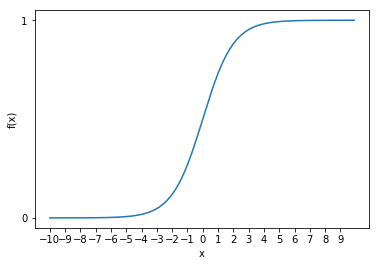

In [4]:
# 시그모이드 함수 그리기
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-10, 10, 0.1)
f = 1 / (1 + np.exp(-x)) # 로지스틱 함수

ax.plot(x, f)
ax.set_xticks(range(-10, 10))
ax.set_yticks(range(0, 2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

### 가중치
- 신경망을 학습시키는 동안 값이 변하는 함수
- 입력과 함께 가중치는 노드의 출력을 결정
- 입력의 가중치를 곱해서 노드의 입력으로 사용, 가중치가 높은쪽이 출력의 더 많은 영향을 준다
![가중치](./가중치.png)


### 편향
- 시그모이드 함수는 입력 x가 0일 때를 기준으로 노드 출력이 변함
- 입력 x에 곱하는 가중치의 크기를 변경하더라도 항상 입력이 0일 때를 기준으로 출력이 0에서 1로 변한다
- 가중치 w만 가지고는 입력 x가 특정 값 이상으로 거칠 때 출력 신호를 0에서 1로 바뀌게 할수 없다.

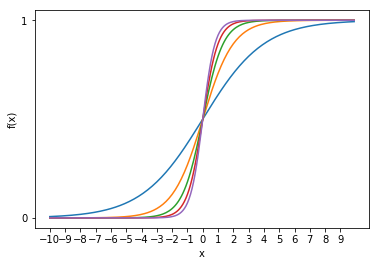

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-10, 10, 0.1)

# 가중치 변화
W = np.arange(0.5, 3, 0.5)
for w in W:
    # 입력 x에 가중치 w 곱함
    f = 1 / (1 + np.exp(-x * w))
    ax.plot(x, f)

ax.set_xticks(range(-10, 10))
ax.set_yticks(range(0, 2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()


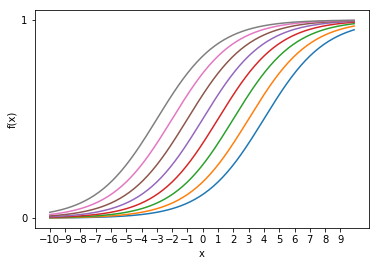

In [10]:
# bias를 추가하면 시그모이드를 좌우로 이동 시킬 수 있다.
# 즉 입력 x가 0이 아닌 곳에서 시그모이드 함수의 출력이 0에서 1로 변하도록 할 수 있다.

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-10, 10, 0.1)

# 가중치 고정
w = 0.5

# 편향 변화
B = np.arange(-2, 2, 0.5)

for b in B:
    # 입력 x에 가중치 w 곱한 후 편향 b를 더함
    f = 1 / (1 + np.exp(-(x * w + b)))
    ax.plot(x, f)

ax.set_xticks(range(-10, 10))
ax.set_yticks(range(0, 2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

### 데이터 세트
- 모델 학습에 사용하는 데이터 묶음을 데이터세트라고 함
- 샘플(sample, example) 은 데이터 세트에 포함되어 있는 데이터 하나로 모델의 입력으로 사용되는 특성(feature), 특성을 모델 입력으로 사용할 때 예측되어야 하는 정답 또는 출력인 라벨(label)로 구성
- 보통 데이터 세트는 학습, 테스트, 검증 데이터 세트로 구성
    - 학습 데이터 세트(train data set)
        - 데이터 세트 중에 모델 학습에 사용되는 부분 집합
        - 모델의 파라미터(신경망의 경우 가중치)를 조정하기 위해 학습하는 동안 사용
    - 테스트 데이터 세트(test data set)
        - 데이터 세트 중에 학습이 완료된 모델을 테스트 하기위해 사용되는 부분 집합
        - 모델 학습 시 테스트 세트를 사용하지 않게 주의
    - 검증 데이터 세트(validation data set)
        - 여러 모델 중 최적의 모델을 선택하기 위해 사용


### 모델 학습
- 모델에서 사용하는 데이터 세트에 라벨이 포함되어 있는지 여부에 따라 지도 학습과 비지도 학습으로 나눠짐
    - 지도학습(supervised learning)
        - 모델의 입력으로 사용되는 특성과 특성으로 부터 예측되어야 하는 라벨을 가지고 모델을 학습시키는 방법
        - 학습 완료 후, 학습에서 사용하지 않은 특성을 모델에 입력하더라도 올바른 예측을 할 수 있도록 함
    - 비지도 학습(unsupervised learning)
        - 모델의 입력으로 사용하는 특성만 제공
        - 주어진 특성으로부터 의미있는 정보를 찾음

### 신경망 학습 매커니즘
![신경망의 학습 매커니즘](./학습_매커니즘.png)
- 학습 순서
    - (A): 학습 데이터 세트의 특징을 신경망에 입력으로 제공
    - (B): 신경망의 예측을 얻음
    - (C): 예측과 학습 데이터 세트의 라벨 차이로 손실 계산
    - (D): 손실을 기반으로 신경망의 가중치 W,b 업데이트
- 다시 학습 데이터 세트의 특징을 입력으로 사용하여 예측한 결과와 라벨의 차이로 손실 계산, 가중치 업데이트
- 특징을 입력으로 사용하여 얻은 예측과 라벨의 차이를 가지고 가중치 조정 반복, 신경망 성능을 개선 시키는 것을 학습(learning)이라고 함


### 신경망 표기법
- $x$
    - 학습 데이터 세트의 특성으로 신경망의 입력으로 사용
- $y$
    - 학습 데이터 세트의 라벨, 신경망의 출력과 비교하여 신경망을 학습시킬때 사용, 신경망 평가때도 사용
- $(x^i, y^i)$
    - i번째 학습 데이터 세트의 샘플
- $h_{wb}(x)$
    - 신경망의 파라미터 W, b를 사용하여 입력 x로 부터 예측된 네트워크의 출력
    - 학습 데이터 세트의 라벨 y와 똑같은 차원 (예를들어 벡터인 경우 같은 크기)을 가져야 한다. $\hat{y}$로 표기
- $W_{ij}^{(l)}$
    - 가중치. l번째 레이어의 j번째 노드와 l+1번째 레이어의 i번째 노드 사이의 연결에 부여되는 가중치
    - 예를들어 첫번째 레이어의 두번째 노드와 두번째 레이어의 세번째 노드간의 가중치 : $W_{32}^{(1)}$
- $b_i^{(l)}$
    - 편향 (bias)
    - l+1번째 레이어의 i번째 노드와 l번째 레이어의 편향 노드 사이에 연결에 부여되는 가중치
    - 예를들어 첫번째 레이어의 편향 노드와 두번째 레이어의 세번째 노드 사이의 연결에 대한 가중치 : $b_3^{(1)}$
- $a_i^{(l)}$
    - l번째 레이어의 i번째 노드의 출력
    - 예를들어 두번째 레이어의 세번째 노드의 출력 : $a_3^{(2)}$
    - 입력의 가중치를 곱한 후 모두 더한 값을 활성화 함수 $f(\cdot)$의 입력으로 사용하여 노드 출력을 얻는다
    $$
    a_3^{(2)} = f(W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)})
    $$
    - 입력 레이어인 첫번째 레이어 노드를 $a_i^{(1)} = x_i$ 로 표시 하기도 한다
- $f(\cdot)$
    - 활성화 함수(activation function)
- $z_i^{(l)}$
    - l번째 레이어의 i번째 노드 입력에 가중치를 곱한 후 모두 더한것
    - $z_i^{(l)}$를 사용하면 식이 간단해 짐
    - 두번째 층의 세번째 노드의 출력을 나타내는 식
    $$
    a_3^{(2)} = f(W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)})
    $$
    - 활성화 함수의 입력을 $z_i^{(l)}$로 나타내면 식은 다음과 같이 간단해짐
    $$
    z_3^{(2)} = W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)}
    $$
    $$
    a_3^{(2)} = f(z_3^{(2)})
    $$
- $a$
    - 학습률(learning rate)
- $s_l$
    - l번째 레이어의 노드 개수 (편향 노드는 제외)
- $n_l$
    - 신경망의 레이어 개수
- $L_l$
    - 신경망의 레이어
    - 보통 $L_1$는 입력 레이어 $L_{nl}$은 출력 레이어 $L_l$은 히든 레이어 $(l=2,3,...n_i-1)$를 나타냄

### 피드포워드
- 학습 데이터 세트의 특성과 신경망의 노드간 연결에 부여되는 가중치를 사용하여 출력을 계산하는 과정
- 입력 레이어, 히든 레이어, 출력 레이어가 각각 1개씩 구성된 경우
![피드포워드](./피드포워드.jpeg)

- 첫 번째 단계로 히든레이(Layer 2, $L_2$) 의 노드 출력 $a_i^{(2)}$을 구합니다.
    - $a_i^{(2)}$ 는 두번쨰 레이어의 i번째 노드의 출력
    - $a_1^{(2)}, a_2^{(2)}, a_3^{(2)}$ 을 구함
- 입력 레이어 (Layer 1, $L_1$)의 노드에서 전달 받은 값과 입력 레이어의 노드와 히든 레이어의 노드 사이에 부여된 가중치를 곱한 후 편향을 포함하여 모두 더하고 나서 활성화 함수의 입력으로 출력을 얻는다
$$
a_1^{(2)} = f(W_{11}^{(1)}x_1 + W_{12}^{(1)}x_2 + W_{13}^{(1)}x_3 + b_1^{(1)})
$$
- 두번째 레이어의 나머지 노드도 같은 방식으로 계산
$$
a_2^{(2)} = f(W_{21}^{(1)}x_1 + W_{22}^{(1)}x_2 + W_{23}^{(1)}x_3 + b_2^{(1)})
$$
- 세번째
$$
a_3^{(2)} = f(W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)})
$$
- 출력 레이어(Layer 3, $L_3$)의 노드 $a_1^{(3)}$ 의 출력을 구함
    - 히든 레이어의 노드에서 전달받은 값과 히든 레이어의 노드와 출력 레이어의 노드 사이에 부여된 가중치를 곱한 후 편향을 포함하여 모두 더하고 나서 활성화 함수의 입력으로 넣어 출력을 얻는다
    $$
    h_{W,b}(x) = a_1^{(3)} = f(W_{11}^{(2)}a_1^{(2)} + W_{12}^{(2)}a_2^{(2)} + W_{13}^{(2)}a_3^{(2)} + b_1^{(2)})
    $$
    
- 정리
    - $z_i^{(l)}$을 도입하여 활성화 함수 f의 입력을 따로 분리
    $$
    z_1^{(2)} = W_{11}^{(1)}x_1 + W_{12}^{(1)}x_2 + W_{13}^{(1)}x_3 + b_1^{(1)}
    $$
    $$
    a_1^{(2)} = f(z_1^{(2)})
    $$
    
    $$
    z_2^{(2)} = W_{21}^{(1)}x_1 + W_{22}^{(1)}x_2 + W_{23}^{(1)}x_3 + b_2^{(1)}
    $$
    $$
    a_2^{(2)} = f(z_2^{(2)})
    $$
    
    $$
    z_3^{(2)} = W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)}
    $$
    $$
    a_3^{(2)} = f(z_3^{(2)})
    $$
    
    $$
    z_1^{(3)} = W_11^{(2)}a_1^{(2)} + W_12^{(2)}a_2^{(2)} + W_13^{(2)}a_3^{(2)} + b_1^{(2)}
    $$
    $$
    h_{W,b}(x) = a_1^{(3)} = f(z_1^{(3)})
    $$
    
- 피드포워드 식에 행렬을 적용하면 넘파이 배열을 사용하여 효율적으로 계산
- 입력을 입력 레이어의 노드의 출력으로 보면 다음과 같이 나타낼 수 있다.
$$
\begin{bmatrix}
a_1^{(1)} \\ a_2^{(1)} \\ a_3^{(1)}
\end{bmatrix}
= 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
$$
$$
a^{(1)} = x
$$

- 히든 레이어의 노드 입력을 행렬로 변경
$$
\begin{bmatrix}
z_1^{(2)} \\ z_2^{(2)} \\ z_3^{(2)}
\end{bmatrix}
= 
\begin{bmatrix}
W_{11}^{(1)}x_1 + W_{12}^{(1)}x_2 + W_{13}^{(1)}x_3 + b_1^{(1)} \\
W_{21}^{(1)}x_1 + W_{22}^{(1)}x_2 + W_{23}^{(1)}x_3 + b_2^{(1)} \\
W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 + W_{33}^{(1)}x_3 + b_3^{(1)}
\end{bmatrix}
$$


$$
\begin{bmatrix}
z_1^{(2)} \\ z_2^{(2)} \\ z_3^{(2)}
\end{bmatrix}
= 
\begin{bmatrix}
W_{11}^{(1)} + W_{12}^{(1)} + W_{13}^{(1)} \\
W_{21}^{(1)} + W_{22}^{(1)} + W_{23}^{(1)} \\
W_{31}^{(1)} + W_{32}^{(1)} + W_{33}^{(1)}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
+
\begin{bmatrix}
b_1^{(1)} \\
b_2^{(1)} \\
b_3^{(1)}
\end{bmatrix}
$$
$$
z^{(2)} = W^{(1)}a^{(1)} + b^{(1)}
$$
- 활성화 함수를 적용하면 히든레이어의 노드 출력이 됩니다
$$
a^{(2)} = f(z^{(2)})
$$
- 출력 레이어의 노드 입력을 다음과 같이 행렬로 바꿉니다
$$
\begin{bmatrix}
z_1^{(3)}
\end{bmatrix}
=
\begin{bmatrix}
W_{11}^{(2)}a_1^{(2)} + W_{12}^{(2)}a_2^{(2)} + W_{13}^{(2)}a_3^{(2)} + b_1^{(2)}
\end{bmatrix}
$$
$$
\begin{bmatrix}
z_1^{(3)}
\end{bmatrix}
=
\begin{bmatrix}
W_{11}^{(2)} & W_{12}^{(2)} & W_{13}^{(2)}  
\end{bmatrix}
\begin{bmatrix}
a_1^{(2)} \\ a_2^{(2)} \\ a_3^{(2)}
\end{bmatrix}
+ 
\begin{bmatrix}
b_1^{(2)}
\end{bmatrix}
$$
$$
Z^{(3)} = W^{(2)}a^{(2)} + b^{(2)}
$$
- 활성화 함수를 적용하면 출력 레이어의 노드 출력이 된다
$$
a^{(3)} = f(z^{(3)})
$$

- 정리
$$
a^{(1)} = x
$$
$$
Z^{(2)} = W^{(1)}a^{(1)} + b^{(1)}
$$
$$
a^{(2)} = f(z^{(2)})
$$
$$
Z^{(3)} = W^{(2)}a^{(2)} + b^{(2)}
$$
$$
a^{(3)} = f(z^{(3)})
$$

- 식을 일반화
$$
Z^{(l+1)} = W^{(l)}a^{(l)} + b^{(l)}
$$
$$
a^{(l+1)} = f(z^{(l+1)})
$$


- 피드포워드를 넘파이 코드로 작성. 가중치와 편향 행렬은 다음과 같이 넘파이 배열로 미리 생성
$$
W^{(1)} = 
\begin{bmatrix}
W_{11}^{(1)} & W_{12}^{(1)} & W_{13}^{(1)} \\
W_{21}^{(1)} & W_{22}^{(1)} & W_{23}^{(1)} \\
W_{31}^{(1)} & W_{32}^{(1)} & W_{33}^{(1)}
\end{bmatrix},
b^{(1)} = 
\begin{bmatrix}
b_1^{(1)} \\ b_2^{(1)} \\ b_2^{(1)}
\end{bmatrix}
$$

$$
W^{(2)} = 
\begin{bmatrix}
W_{11}^{(2)} & W_{12}^{(2)} & W_{13}^{(2)} \\
\end{bmatrix},
b^{(2)} = 
\begin{bmatrix}
b_1^{(2)}
\end{bmatrix}
$$

In [1]:
import numpy as np


# 활성화 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 피드포워드를 수행하는 함수
def feed_forward(x, W1, W2, b1, b2):
    
    # 입력 레이어
    a1 = x
    
    # 히든 레이어
    z2 = np.dot(W1, a1) + b1
    a2 = sigmoid(z2)
    
    # 출력 레이어
    # a3에 신경망의 출력이 저장
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    return a1, a2, a3, z2, z3

# 신경망을 구성하는 레이어의 노드 개수 지정
# 신경망은 총 3개의 레이어로 구성
# 입력 레이어 노드개수 3, 히든 레이어 3, 출력 레이어 1

node_size={
    'input_layer_size':3,
    'hidden_layer_size': 3,
    'output_layer_size': 1
}

# 가중치와 편향을 무작위 값으로 초기화 생성
# 각 넘파이 배열 생성 시 아규먼트에 포함되는 레이어의 순서를 봐두면 좋다
W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2 = np.random.random(node_size['output_layer_size'])
b1 = np.random.random(node_size['hidden_layer_size'])

# 학습 데이터 세트
# 특성 X, 라벨 Y
X = np.array([[1, 0, 0], [0, 0, 1], [0,1,1], [1, 0, 1], [1, 1, 0], [0, 1, 0], [1, 1, 1]])
Y = np.array([1, 0, 0, 0, 1, 1, 0])

# 특성 하나인 x에 대해 피드포워드 수행
# 라벨 하나인 y는 비용 계산을 위해 사용
for x,y in zip(X, Y):
    
    # 특성과 가중치를 사용하여 피드포워드를 수행, 결과를 리턴
    # 6.13 에서 살펴볼 역전파 알고리즘에서 사용
    a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)
    
    # 신경망의 출력 a3와 라벨 y로 부터 비용 계산
    # L2 Norm 계산을 위해 넘파이에서 제공하는 함수를 사용
    print('a3={}, y={}, Error(L2 Norm)={}'.format(a3, y, np.linalg.norm((y-a3), 2)))
    

a3=[0.77823403], y=1, Error(L2 Norm)=0.2217659661051824
a3=[0.79656099], y=0, Error(L2 Norm)=0.7965609900474965
a3=[0.8107858], y=0, Error(L2 Norm)=0.8107858038540674
a3=[0.81189773], y=0, Error(L2 Norm)=0.8118977310922281
a3=[0.79639794], y=1, Error(L2 Norm)=0.20360206006914483
a3=[0.77328318], y=1, Error(L2 Norm)=0.22671681868669258
a3=[0.82296687], y=0, Error(L2 Norm)=0.8229668685810562


- 신경망을 학습하는 목표는 지정한 입력에 대해서 신경망이 기대하는 출력을 내놓도록 하는것
- 이를위해 출력 $h_{w,b}$ 와 입력에 대한 기대 출력인 라벨 y의 차이를 비용으로 보고 비용을 최소화
- 책에선 비용 계산을 위해 L2 Norm을 사용
$$
cost = ||y - h_{w,b}(x)||^2 = \sqrt{(y - h_{w,b}(x))^2}
$$
- L2 Norm 식
$$
||u|| = \sqrt{u \cdot u} = \sqrt{ \sum_{i=1}^n u_i^2 }
$$

- 신경망의 에러를 최소화 하는 방법은 비용함수를 최소화 하는것
- 하나의 샘플 데이터 (x, y) 를 위한 비용함수는 다음과 같음
- 1/2은 뒤에서 볼 역전파 시 미분 결과에서 상수 2가 식 앞에 붙는것을 상쇄하기 위해 추가
$$
J(W,b;x,y) = \frac{1}{2}||y - h_{W,b}(x)||^2
$$
- 신경망 전체에 대한 비용함수는 다음과 같음
$$
J(W,b) = \frac{1}{m}\sum_{i=1}^mJ(W,b;x^{(i)},y^{(i)})
$$
$$
= \frac{1}{m}\sum_{i=1}^m(\frac{1}{2}||y^{(i)} - h_{W,b}(x^{(i)})||^2)
$$